In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

4.0
4.8176704169424225


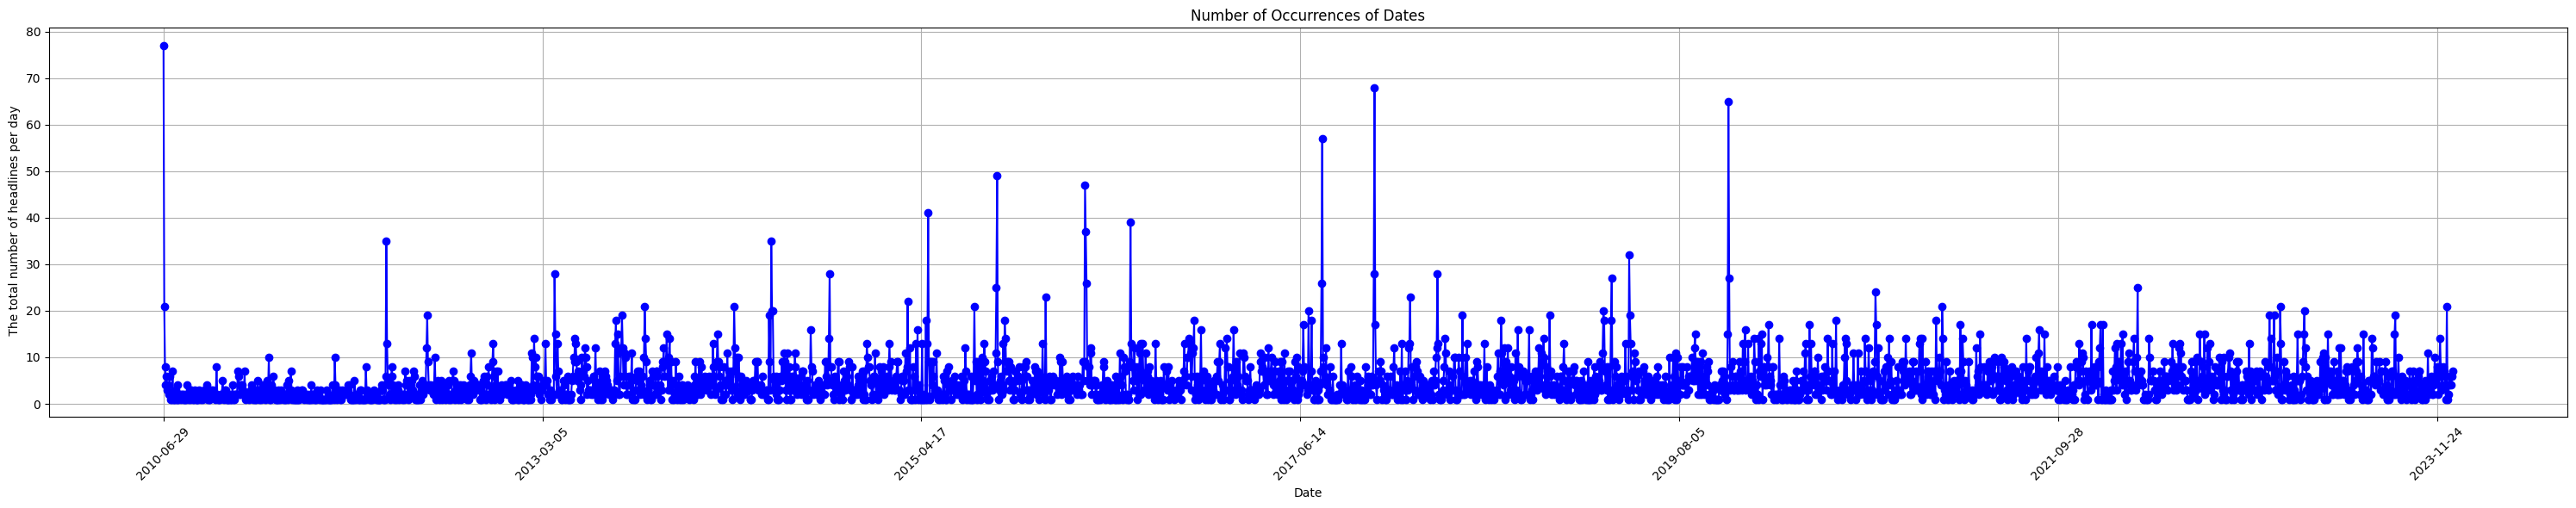

In [49]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('tesla_data(Alfred)_version2.csv')

# Count the occurrences of each date
date_counts = df['Dates'].value_counts().sort_index()

print(date_counts.median())
print(date_counts.mean())

# Plotting the line graph
plt.figure(figsize=(30, 6))
date_counts.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Number of Occurrences of Dates')
plt.xlabel('Date')
plt.ylabel(' The total number of headlines per day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

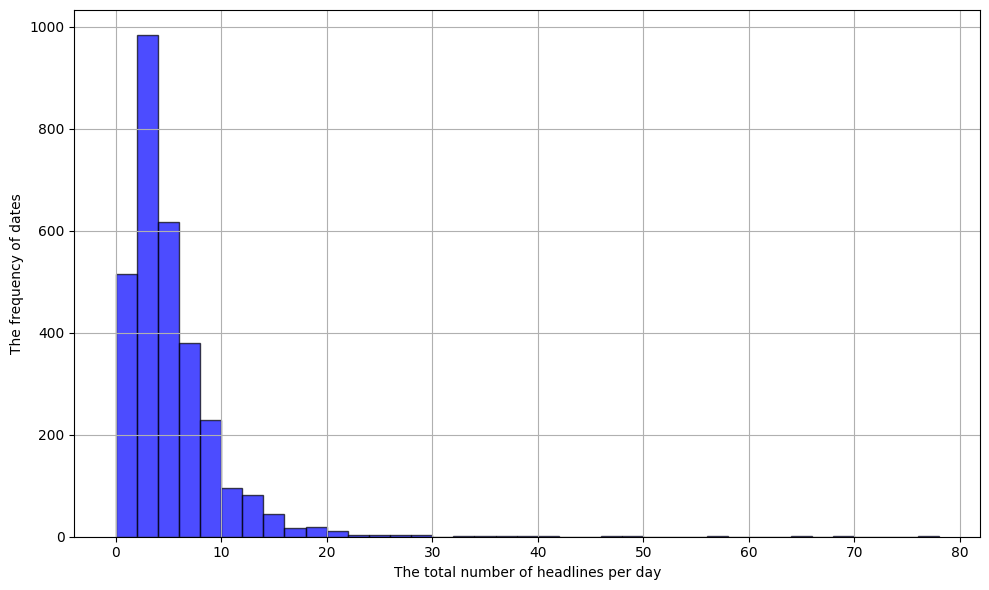

In [9]:
bins = [i for i in range(0, max(date_counts)+3, 2)]

plt.figure(figsize=(10, 6))
date_counts.hist(bins=bins, color='blue', edgecolor='black', alpha=0.7)
plt.title('')
plt.xlabel('The total number of headlines per day')
plt.ylabel('The frequency of dates')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import csv


df2 = pd.read_csv('../../data(stock_price)/TSLA/stock_price.csv')


unique_dates = set()  # Create an empty set to store unique dates

with open('tesla_data(Alfred)_version2.csv', "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        date = row[1]  # Assuming the date is in the second column (index 1)
        unique_dates.add(date)  # Add the date to the set

unique_dates_list = list(unique_dates)  

print(unique_dates_list)

3022


In [31]:
all_dates = []

with open('../../data(stock_price)/TSLA/stock_price.csv', "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        date = row[0]  # Assuming the date is in the second column (index 1)
        all_dates.append(date)  # Add the date to the set

print(all_dates)

['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15', '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23', '2010-07-26', '2010-07-27', '2010-07-28', '2010-07-29', '2010-07-30', '2010-08-02', '2010-08-03', '2010-08-04', '2010-08-05', '2010-08-06', '2010-08-09', '2010-08-10', '2010-08-11', '2010-08-12', '2010-08-13', '2010-08-16', '2010-08-17', '2010-08-18', '2010-08-19', '2010-08-20', '2010-08-23', '2010-08-24', '2010-08-25', '2010-08-26', '2010-08-27', '2010-08-30', '2010-08-31', '2010-09-01', '2010-09-02', '2010-09-03', '2010-09-07', '2010-09-08', '2010-09-09', '2010-09-10', '2010-09-13', '2010-09-14', '2010-09-15', '2010-09-16', '2010-09-17', '2010-09-20', '2010-09-21', '2010-09-22', '2010-09-23', '2010-09-24', '2010-09-27', '2010-09-28', '2010-09-29', '2010-09-30', '2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06', '2010-10-07', '2010

In [38]:
missing_dates = []

for date in all_dates:
    if date not in unique_dates_list:
        missing_dates.append(date)

missing_dates.sort()

print(missing_dates)
        

['2010-07-20', '2010-07-22', '2010-07-30', '2010-08-10', '2010-08-11', '2010-08-12', '2010-08-13', '2010-08-16', '2010-08-18', '2010-08-24', '2010-08-25', '2010-08-27', '2010-08-30', '2010-09-01', '2010-09-02', '2010-09-03', '2010-09-09', '2010-09-14', '2010-09-16', '2010-09-17', '2010-09-20', '2010-09-30', '2010-10-11', '2010-10-12', '2010-10-15', '2010-10-20', '2010-10-21', '2010-10-26', '2010-11-01', '2010-11-02', '2010-11-23', '2010-11-30', '2010-12-13', '2010-12-14', '2010-12-28', '2010-12-30', '2011-01-03', '2011-01-26', '2011-01-28', '2011-01-31', '2011-02-02', '2011-02-07', '2011-02-09', '2011-02-11', '2011-02-18', '2011-02-23', '2011-02-24', '2011-02-25', '2011-03-01', '2011-03-14', '2011-03-22', '2011-04-01', '2011-04-07', '2011-04-11', '2011-04-12', '2011-04-18', '2011-04-20', '2011-04-21', '2011-05-02', '2011-05-03', '2011-05-05', '2011-05-06', '2011-05-13', '2011-05-17', '2011-05-20', '2011-05-24', '2011-05-26', '2011-06-02', '2011-06-13', '2011-06-15', '2011-06-28', '2011

In [50]:
from datetime import datetime

continuous_intervals = []  # List to store continuous intervals

current_interval = [missing_dates[0]]  # Initialize the current interval with the first date

for i in range(1, len(missing_dates)):
    current_date = missing_dates[i]
    prev_date = missing_dates[i - 1]

    # Check if the current date is consecutive to the previous date
    if (datetime.strptime(current_date, '%Y-%m-%d') - datetime.strptime(prev_date, '%Y-%m-%d')).days == 1:
        current_interval.append(current_date)  # Add the current date to the current interval
    else:
        continuous_intervals.append([current_interval[0], current_interval[-1], len(current_interval)])  # Store the current interval as a list
        current_interval = [current_date]  # Start a new interval with the current date

# Append the last interval
continuous_intervals.append([current_interval[0], current_interval[-1], len(current_interval)])

print(continuous_intervals)

[['2010-07-20', '2010-07-20', 1], ['2010-07-22', '2010-07-22', 1], ['2010-07-30', '2010-07-30', 1], ['2010-08-10', '2010-08-13', 4], ['2010-08-16', '2010-08-16', 1], ['2010-08-18', '2010-08-18', 1], ['2010-08-24', '2010-08-25', 2], ['2010-08-27', '2010-08-27', 1], ['2010-08-30', '2010-08-30', 1], ['2010-09-01', '2010-09-03', 3], ['2010-09-09', '2010-09-09', 1], ['2010-09-14', '2010-09-14', 1], ['2010-09-16', '2010-09-17', 2], ['2010-09-20', '2010-09-20', 1], ['2010-09-30', '2010-09-30', 1], ['2010-10-11', '2010-10-12', 2], ['2010-10-15', '2010-10-15', 1], ['2010-10-20', '2010-10-21', 2], ['2010-10-26', '2010-10-26', 1], ['2010-11-01', '2010-11-02', 2], ['2010-11-23', '2010-11-23', 1], ['2010-11-30', '2010-11-30', 1], ['2010-12-13', '2010-12-14', 2], ['2010-12-28', '2010-12-28', 1], ['2010-12-30', '2010-12-30', 1], ['2011-01-03', '2011-01-03', 1], ['2011-01-26', '2011-01-26', 1], ['2011-01-28', '2011-01-28', 1], ['2011-01-31', '2011-01-31', 1], ['2011-02-02', '2011-02-02', 1], ['2011-02

In [52]:
new_continuous_intervals = []

for interval in continuous_intervals:
    date_range = [interval[0], interval[1]]  # Extract date range
    count = interval[2]  # Extract count
    new_interval = [date_range, count]  # Format the interval
    new_continuous_intervals.append(new_interval)  # Append the formatted interval to the new list

print(new_continuous_intervals)

[[['2010-07-20', '2010-07-20'], 1], [['2010-07-22', '2010-07-22'], 1], [['2010-07-30', '2010-07-30'], 1], [['2010-08-10', '2010-08-13'], 4], [['2010-08-16', '2010-08-16'], 1], [['2010-08-18', '2010-08-18'], 1], [['2010-08-24', '2010-08-25'], 2], [['2010-08-27', '2010-08-27'], 1], [['2010-08-30', '2010-08-30'], 1], [['2010-09-01', '2010-09-03'], 3], [['2010-09-09', '2010-09-09'], 1], [['2010-09-14', '2010-09-14'], 1], [['2010-09-16', '2010-09-17'], 2], [['2010-09-20', '2010-09-20'], 1], [['2010-09-30', '2010-09-30'], 1], [['2010-10-11', '2010-10-12'], 2], [['2010-10-15', '2010-10-15'], 1], [['2010-10-20', '2010-10-21'], 2], [['2010-10-26', '2010-10-26'], 1], [['2010-11-01', '2010-11-02'], 2], [['2010-11-23', '2010-11-23'], 1], [['2010-11-30', '2010-11-30'], 1], [['2010-12-13', '2010-12-14'], 2], [['2010-12-28', '2010-12-28'], 1], [['2010-12-30', '2010-12-30'], 1], [['2011-01-03', '2011-01-03'], 1], [['2011-01-26', '2011-01-26'], 1], [['2011-01-28', '2011-01-28'], 1], [['2011-01-31', '20

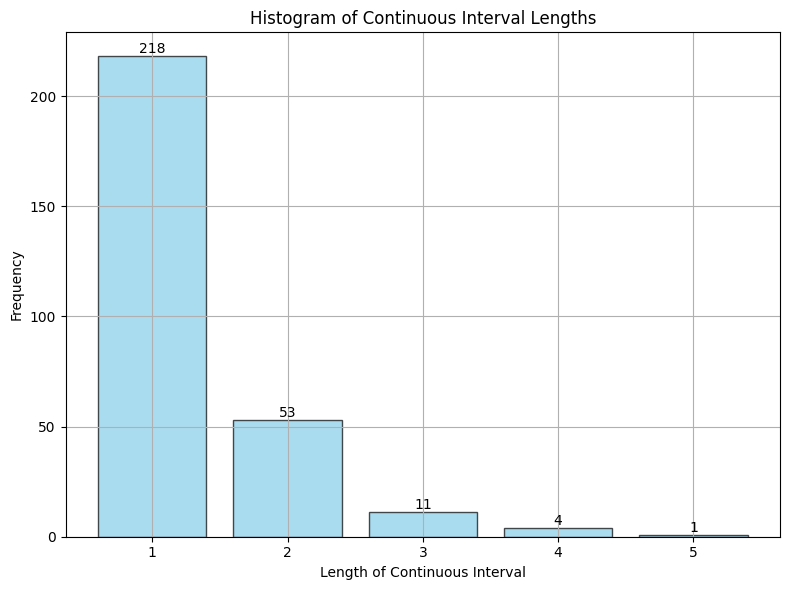

In [51]:
from collections import Counter
import matplotlib.pyplot as plt

interval_lengths = [interval[2] for interval in continuous_intervals]

interval_counts = Counter(interval_lengths)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(interval_counts.keys(), interval_counts.values(), color='skyblue', edgecolor='black', alpha=0.7)

# Annotate each bar with its frequency
for x, y in zip(interval_counts.keys(), interval_counts.values()):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Adding labels and title
plt.title('Histogram of Continuous Interval Lengths')
plt.xlabel('Length of Continuous Interval')
plt.ylabel('Frequency')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()